In [1]:
import numpy as np
import pandas as pd

In [3]:
us_scf = pd.read_csv('./data_reference/SCFP2022.csv', on_bad_lines= 'skip')

In [4]:
us_scf.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


In [5]:
us_scf_concise = us_scf[[
    'WGT',
    'AGE', 'OCCAT1', 'OCCAT2',
    'INCOME', 'WAGEINC', 'BUSSEFARMINC', 'INTDIVINC', 'KGINC', 'TRANSFOTHINC', 'SSRETINC',
    'ASSET', 'DEBT', 'NETWORTH', 'HOUSES', 'MRTHEL', 'NFIN',
    'FIN', 'ODEBT', 'LIQ', 'BOND', 'STOCKS', 'IRAKH', 'OTHMA'
]]

In [6]:
us_scf_concise.head()

,WGT,AGE,OCCAT1,OCCAT2,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,...,HOUSES,MRTHEL,NFIN,FIN,ODEBT,LIQ,BOND,STOCKS,IRAKH,OTHMA
0,3027.956120,70,3,4,38804.734469,0.0,0.0,54.045591,0.0,0.0,...,674000,195000,699000.0,258100,0,13100,0,0,245000,0
1,3054.900065,70,3,4,38264.278557,0.0,0.0,54.045591,0.0,0.0,...,858000,213000,883000.0,184300,0,7300,0,0,177000,0
2,3163.637766,70,3,4,36102.454910,0.0,0.0,54.045591,0.0,0.0,...,757000,279000,782000.0,175200,0,5200,0,0,170000,0
3,3166.228463,70,3,4,33508.266533,0.0,0.0,54.045591,0.0,0.0,...,710000,549000,735000.0,93600,0,51600,0,0,42000,0
4,3235.624715,70,3,4,35561.998998,0.0,0.0,54.045591,0.0,0.0,...,765000,223000,791000.0,34600,0,7600,0,0,27000,0


<Axes: ylabel='Frequency'>

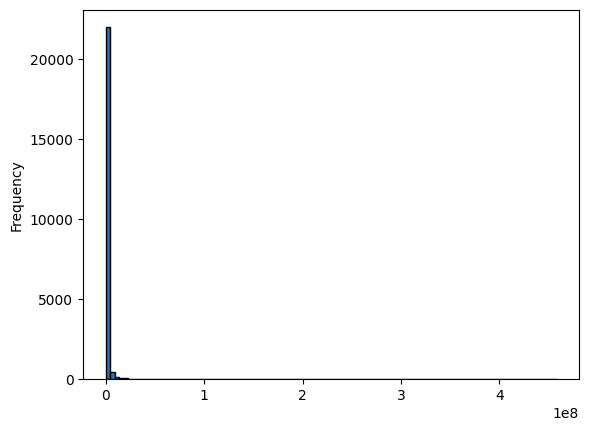

In [7]:
# EDA

us_scf_concise['INCOME'].plot(kind='hist', bins=100, edgecolor='black')

In [8]:
# prompt: describe the distribution of us_scf_concise

# Import necessary libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Describe the distribution of key variables
print(us_scf_concise.describe())

# Histograms for key variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(us_scf_concise['INCOME'], kde=True)
plt.title('Distribution of Income')

plt.subplot(2, 3, 2)
sns.histplot(us_scf_concise['AGE'], kde=True)
plt.title('Distribution of Age')


plt.subplot(2, 3, 3)
sns.histplot(us_scf_concise['NETWORTH'], kde=True)
plt.title('Distribution of Net Worth')


plt.subplot(2, 3, 4)
sns.histplot(us_scf_concise['ASSET'], kde=True)
plt.title('Distribution of Assets')


plt.subplot(2, 3, 5)
sns.histplot(us_scf_concise['DEBT'], kde=True)
plt.title('Distribution of Debt')


plt.subplot(2, 3, 6)
sns.histplot(us_scf_concise['WAGEINC'], kde=True)
plt.title('Distribution of Wage Income')


plt.tight_layout()
plt.show()

# Boxplots to visualize potential outliers
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.boxplot(y=us_scf_concise['INCOME'])
plt.title('Boxplot of Income')

plt.subplot(2, 3, 2)
sns.boxplot(y=us_scf_concise['AGE'])
plt.title('Boxplot of Age')

plt.subplot(2, 3, 3)
sns.boxplot(y=us_scf_concise['NETWORTH'])
plt.title('Boxplot of Net Worth')

plt.subplot(2, 3, 4)
sns.boxplot(y=us_scf_concise['ASSET'])
plt.title('Boxplot of Assets')

plt.subplot(2, 3, 5)
sns.boxplot(y=us_scf_concise['DEBT'])
plt.title('Boxplot of Debt')

plt.subplot(2, 3, 6)
sns.boxplot(y=us_scf_concise['WAGEINC'])
plt.title('Boxplot of Wage Income')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = us_scf_concise.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

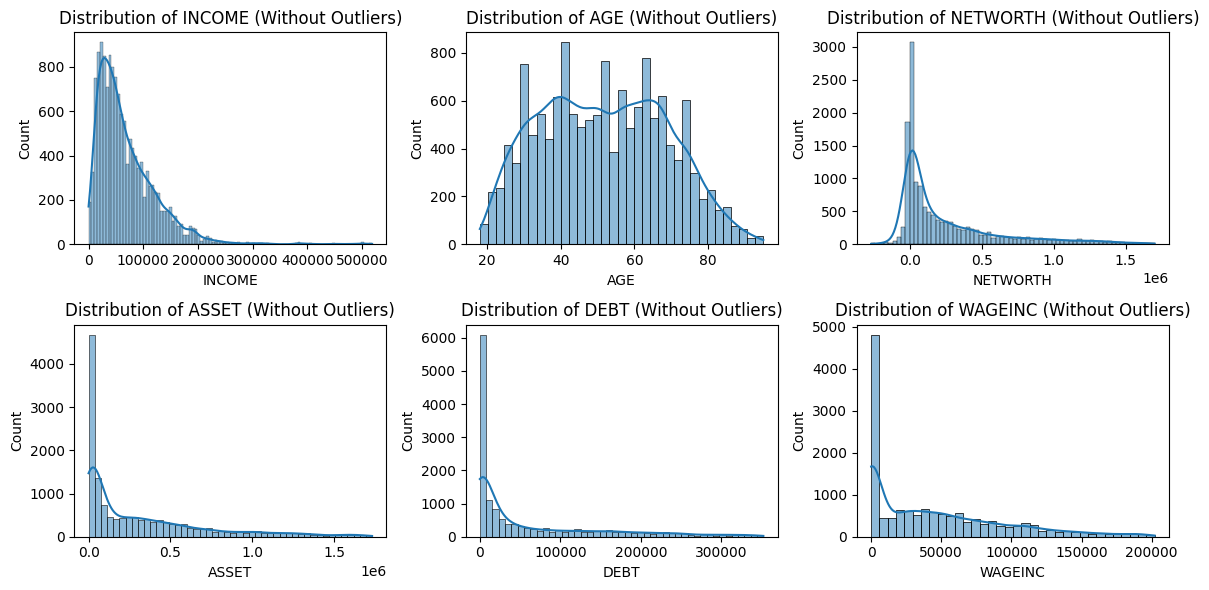

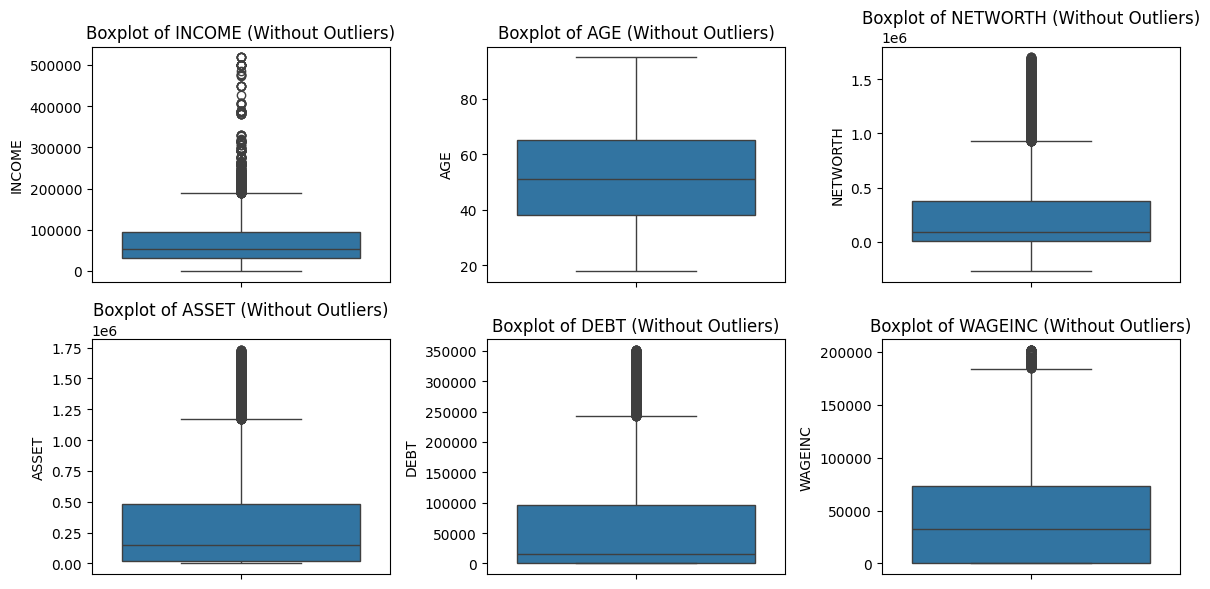

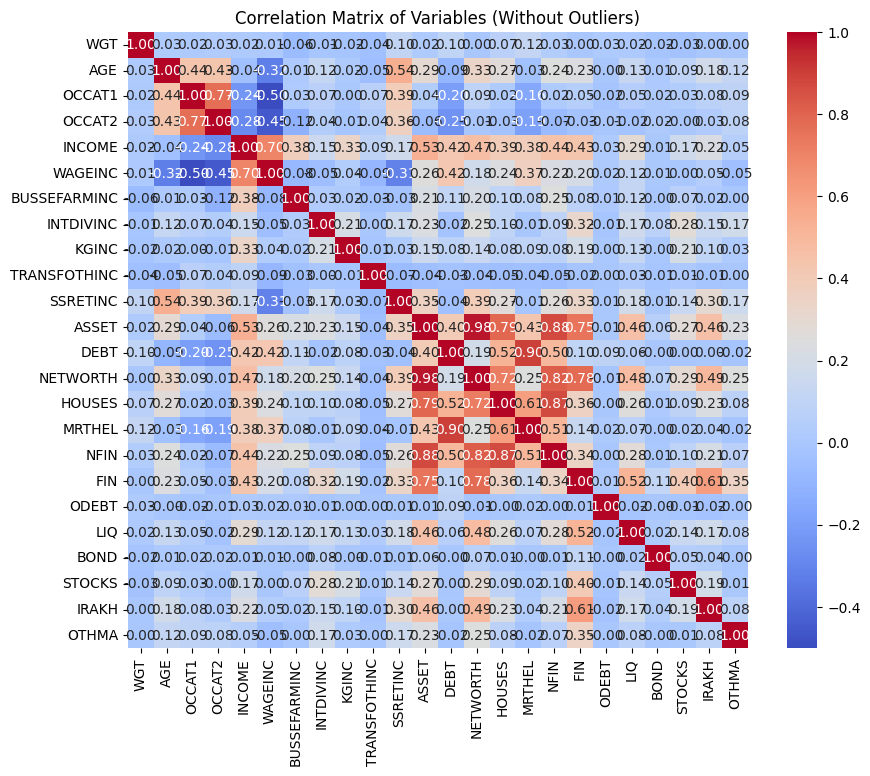

In [ ]:
# prompt: can you also do the above EDA excluding outliers?

import numpy as np

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


# List of columns to process
columns_to_process = ['INCOME', 'AGE', 'NETWORTH', 'ASSET', 'DEBT', 'WAGEINC']

# Remove outliers from the specified columns
us_scf_no_outliers = us_scf_concise.copy()  # Create a copy to avoid modifying the original DataFrame
for col in columns_to_process:
    us_scf_no_outliers = remove_outliers_iqr(us_scf_no_outliers, col)

# EDA without Outliers

# Histograms for key variables without outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_process):
    plt.subplot(2, 3, i + 1)
    sns.histplot(us_scf_no_outliers[col], kde=True)
    plt.title(f'Distribution of {col} (Without Outliers)')

plt.tight_layout()
plt.show()

# Boxplots to visualize data without outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_process):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=us_scf_no_outliers[col])
    plt.title(f'Boxplot of {col} (Without Outliers)')

plt.tight_layout()
plt.show()

# Correlation matrix without outliers
correlation_matrix_no_outliers = us_scf_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_no_outliers, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables (Without Outliers)')
plt.show()

In [ ]:
# lookup using age

In [ ]:
age_df = pd.read_csv('/content/Singapore Residents Age Sex.csv')

In [179]:
age_df.head()

,Data Series,2024,2023,2022,2021,2020,2019,2018,2017,2016,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,18 Year,41810,41397,40553,42068,43232,48341,47258,45663,49067,...,44188,41589,42333,45225,47508,51247,51518,54622,53972,54278
1,19 Year,41612,41106,42879,43047,48448,47527,45783,49078,49988,...,41645,42298,45193,47453,51184,51474,54570,53909,54268,55744
2,20 Year,41202,43160,43446,47963,47492,45880,49185,49982,51111,...,42342,45196,47424,51145,51453,54547,53882,54309,55787,56187
3,21 Year,43083,43626,48170,46755,45740,49141,49961,51002,51652,...,45340,47494,51149,51467,54582,53924,54416,55900,56315,55814
4,22 Year,43550,48455,47038,44834,49102,50013,50987,51534,52752,...,47651,51272,51502,54584,53977,54511,56001,56482,56032,54510


In [180]:
age_df['Age Group'] = pd.cut(age_df['Data Series'].str.extract('(\d+)').astype(int)[0],
                             bins=[0, 18, 25, 35, 45, 55, 65, 75, 85, 100],
                             labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100'])

age_2024_counts = age_df.groupby('Age Group')['2024 '].sum()
age_2024_counts

<ipython-input-180-806e3179a3ee>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_2024_counts = age_df.groupby('Age Group')['2024 '].sum()


,2024
Age Group,
0-18,41810
19-25,313334
26-35,613417
36-45,615502
46-55,604152
56-65,591082
66-75,450987
76-85,189836
86-100,30979


In [181]:
us_scf_concise.head()

,WGT,AGE,OCCAT1,OCCAT2,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,...,HOUSES,MRTHEL,NFIN,FIN,ODEBT,LIQ,BOND,STOCKS,IRAKH,OTHMA
0,3027.956120,70,3,4,38804.734469,0.0,0.0,54.045591,0.0,0.0,...,674000,195000,699000.0,258100,0,13100,0,0,245000,0
1,3054.900065,70,3,4,38264.278557,0.0,0.0,54.045591,0.0,0.0,...,858000,213000,883000.0,184300,0,7300,0,0,177000,0
2,3163.637766,70,3,4,36102.454910,0.0,0.0,54.045591,0.0,0.0,...,757000,279000,782000.0,175200,0,5200,0,0,170000,0
3,3166.228463,70,3,4,33508.266533,0.0,0.0,54.045591,0.0,0.0,...,710000,549000,735000.0,93600,0,51600,0,0,42000,0
4,3235.624715,70,3,4,35561.998998,0.0,0.0,54.045591,0.0,0.0,...,765000,223000,791000.0,34600,0,7600,0,0,27000,0


In [182]:
us_scf_concise['Age Group'] = pd.cut(us_scf_concise['AGE'],
                             bins=[0, 18, 25, 35, 45, 55, 65, 75, 85, 100],
                             labels=['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100'])

<ipython-input-182-17509ad011ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_scf_concise['Age Group'] = pd.cut(us_scf_concise['AGE'],


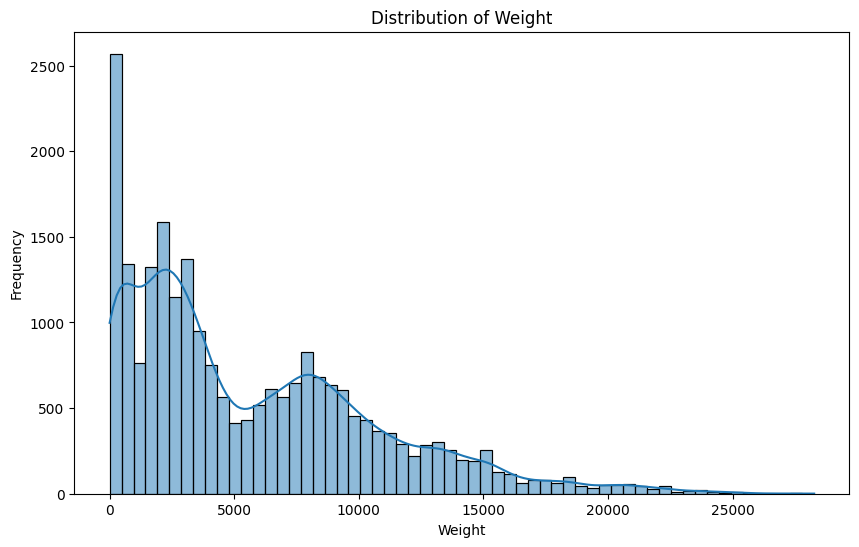

In [183]:
# prompt: show me the distribution of weight

# Assuming 'WGT' represents weight
plt.figure(figsize=(10, 6))
sns.histplot(us_scf_concise['WGT'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [184]:
us_scf_concise['WGT'].describe()

,WGT
count,22975.000000
mean,5715.185610
std,4966.430219
min,2.754882
25%,1850.200822
50%,4083.825044
75%,8746.732248
max,28265.283116


In [185]:
# prompt: I want to write a function to sample people from an age group (18-25) based on the weights assigned to them. the sample should follow the same age distribution as the population

import pandas as pd
import numpy as np

def sample_age_group(df, age_group, sample_size):
    """
    Samples individuals from a specific age group based on weights.

    Args:
        df: DataFrame containing 'AGE', 'WGT' columns.
        age_group: Tuple representing the age range (min, max).
        sample_size: The desired sample size.

    Returns:
        A DataFrame representing the sample.
        Returns None if the age group is not found or sample_size is not positive.
    """

    if sample_size <= 0:
        print("Error: sample_size must be positive")
        return None

    # Filter data for the specified age group
    age_df = df[(df['AGE'] >= age_group[0]) & (df['AGE'] <= age_group[1])]

    if age_df.empty:
        print(f"Error: No individuals found in the age group {age_group}")
        return None

    # Sample with replacement based on weights
    sample = age_df.sample(n=sample_size, weights='WGT', replace=True)

    return sample

# Example usage (assuming 'us_scf_concise' is your DataFrame)
# Replace with your actual dataframe
# Assuming us_scf_concise is defined in the previous code cells.

age_group_to_sample = (18, 25)
sample_size_desired = 1000

sampled_data = sample_age_group(us_scf_concise, age_group_to_sample, sample_size_desired)


if sampled_data is not None:
    print(sampled_data.head())
    # Perform further analysis or operations on the sampled_data

                WGT  AGE  OCCAT1  OCCAT2        INCOME       WAGEINC  \
6029    3782.168110   21       1       2  49721.943888  49721.943888   
21081  11096.179266   21       1       2    432.364729      0.000000   
15707  24988.102405   23       1       2  52964.679359  52964.679359   
19250  11163.630122   21       1       3  27022.795591  27022.795591   
11155   9617.269738   25       1       2  41074.649299  41074.649299   

       BUSSEFARMINC  INTDIVINC       KGINC  TRANSFOTHINC  ...  MRTHEL  \
6029            0.0   0.000000    0.000000           0.0  ...       0   
21081           0.0   0.000000  432.364729           0.0  ...       0   
15707           0.0   0.000000    0.000000           0.0  ...       0   
19250           0.0   0.000000    0.000000           0.0  ...       0   
11155           0.0  43.236473    0.000000           0.0  ...       0   

          NFIN    FIN  ODEBT    LIQ  BOND  STOCKS  IRAKH  OTHMA  Age Group  
6029   15000.0  33300      0  33300     0       0  

In [186]:
sample = 3000

age_group_size = (sample * age_2024_counts[1:-1]/age_2024_counts[1:-1].sum()).map(lambda x:int(x))
age_group_size


,2024
Age Group,
19-25,278
26-35,544
36-45,546
46-55,536
56-65,524
66-75,400
76-85,168


In [187]:
sample_mapped_data = pd.DataFrame()
for age_group, count in age_group_size.items():
  us_scf_age_group = us_scf_concise[us_scf_concise['Age Group'] == age_group]
  new_rows = us_scf_age_group.sample(n=count, weights='WGT', replace=True)

  # print(count)
  # print(len(us_scf_age_group))

  sample_mapped_data = pd.concat([sample_mapped_data, new_rows])



In [188]:
sample_mapped_data

,WGT,AGE,OCCAT1,OCCAT2,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,...,MRTHEL,NFIN,FIN,ODEBT,LIQ,BOND,STOCKS,IRAKH,OTHMA,Age Group
9206,6279.901257,21,1,3,44317.384770,43236.472946,1080.911824,0.000000,0.000000,0.000000,...,0,20000.0,3200,800,3200,0,0,0,0,19-25
18431,22084.186033,19,4,4,11890.030060,11890.030060,0.000000,0.000000,0.000000,0.000000,...,0,10000.0,6250,29000,6250,0,0,0,0,19-25
4386,24053.796135,24,1,3,52964.679359,48641.032064,0.000000,0.000000,0.000000,4539.829659,...,83000,192400.0,430,0,30,0,0,0,0,19-25
13900,15892.201562,20,1,1,43236.472946,43236.472946,0.000000,0.000000,0.000000,0.000000,...,0,0.0,11,0,11,0,0,0,0,19-25
19134,23160.011588,22,2,3,21618.236473,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,263000.0,168000,0,18000,0,0,150000,0,19-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,13628.290697,78,3,4,33940.631263,0.000000,0.000000,194.564128,86.472946,0.000000,...,0,371700.0,93000,0,38000,0,0,53000,0,76-85
367,11702.240851,80,3,4,36751.002004,0.000000,0.000000,1513.276553,0.000000,0.000000,...,0,253000.0,314000,0,42000,0,0,100000,0,76-85
11262,6832.177368,76,1,1,226991.482970,118900.300600,3567.009018,48749.123246,8539.203407,0.000000,...,0,3726400.0,6748000,0,533000,964000,4000000,0,0,76-85
8145,3353.900613,77,3,4,606391.533070,0.000000,432364.729460,100524.799600,0.000000,0.000000,...,0,7298300.0,4736000,0,411000,0,3200000,525000,600000,76-85


In [189]:
usd_sgd_exchange_rate = 1.378

exclude_columns = ['WGT', 'AGE', 'OCCAT1', 'OCCAT2', 'Age Group']

In [190]:
sample_mapped_data_usd = sample_mapped_data.copy()

In [191]:
sample_mapped_data_sgd = sample_mapped_data_usd.loc[:, ~sample_mapped_data_usd.columns.isin(exclude_columns)] * usd_sgd_exchange_rate

In [192]:
sample_mapped_data_sgd[exclude_columns] = sample_mapped_data_usd[exclude_columns]

In [193]:
sample_mapped_data_sgd.head()

,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,SSRETINC,ASSET,DEBT,NETWORTH,...,LIQ,BOND,STOCKS,IRAKH,OTHMA,WGT,AGE,OCCAT1,OCCAT2,Age Group
9206,61069.356213,59579.859720,1489.496493,0.0,0.0,0.000000,0.00000,31969.600,23798.06,8171.540,...,4409.600,0.0,0.0,0.0,0.0,6279.901257,21,1,3,19-25
18431,16384.461423,16384.461423,0.000000,0.0,0.0,0.000000,0.00000,22392.500,39962.00,-17569.500,...,8612.500,0.0,0.0,0.0,0.0,22084.186033,19,4,4,19-25
4386,72985.328157,67027.342184,0.000000,0.0,0.0,6255.885271,0.00000,265719.740,116124.06,149595.680,...,41.340,0.0,0.0,0.0,0.0,24053.796135,24,1,3,19-25
13900,59579.859720,59579.859720,0.000000,0.0,0.0,0.000000,0.00000,15.158,0.00,15.158,...,15.158,0.0,0.0,0.0,0.0,15892.201562,20,1,1,19-25
19134,29789.929860,0.000000,0.000000,0.0,0.0,0.000000,29789.92986,593918.000,2067.00,591851.000,...,24804.000,0.0,0.0,206700.0,0.0,23160.011588,22,2,3,19-25


In [194]:
sample_mapped_data_sgd['NETHOUSE'] = sample_mapped_data_sgd['HOUSES'] - sample_mapped_data_sgd['MRTHEL']
sample_mapped_data_sgd['NETFIN'] = sample_mapped_data_sgd['FIN'] - sample_mapped_data_sgd['ODEBT']
sample_mapped_data_sgd['NETHOUSECLIPPED'] = sample_mapped_data_sgd['NETHOUSE'].clip(upper = 1000000)
sample_mapped_data_sgd['NETHOUSEDIFF'] = sample_mapped_data_sgd['NETHOUSE'] - sample_mapped_data_sgd['NETHOUSECLIPPED']
sample_mapped_data_sgd["NETWORTHADJUSTED"] = sample_mapped_data_sgd['NETWORTH'] - sample_mapped_data_sgd['NETHOUSEDIFF']

In [195]:
sample_mapped_data_sgd_npa = sample_mapped_data_sgd[sample_mapped_data_sgd["NETWORTHADJUSTED"] >= 2000000]
sample_mapped_data_sgd_income_qualifier = sample_mapped_data_sgd[sample_mapped_data_sgd['INCOME'] >= 300000]
sample_mapped_data_sgd_financial_qualifier = sample_mapped_data_sgd[sample_mapped_data_sgd['NETFIN'] >= 1000000]

In [196]:
sample_mapped_data_sgd_filtered = pd.concat([
    sample_mapped_data_sgd_income_qualifier,
    sample_mapped_data_sgd_financial_qualifier,
    sample_mapped_data_sgd_npa,
], axis=0)

In [197]:
sample_mapped_data_sgd_filtered_noduplicates = sample_mapped_data_sgd_filtered.drop_duplicates()
sample_mapped_data_sgd_filtered_noduplicates

,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,SSRETINC,ASSET,DEBT,NETWORTH,...,WGT,AGE,OCCAT1,OCCAT2,Age Group,NETHOUSE,NETFIN,NETHOUSECLIPPED,NETHOUSEDIFF,NETWORTHADJUSTED
6317,619630.541086,126607.201904,-6851.683868,16414.251353,484086.360227,0.000000,0.000000,1723051.2,351390.0,1371661.2,...,2122.519052,35,1,1,26-35,107484.0,1222837.2,107484.0,0.0,1371661.2
2473,640483.491986,253214.403808,0.000000,0.000000,297899.298598,89369.789579,0.000000,1033500.0,663507.0,369993.0,...,12200.762907,34,1,1,26-35,228748.0,44096.0,228748.0,0.0,369993.0
20293,312794.263533,297899.298598,0.000000,74.474825,14894.964929,0.000000,0.000000,830520.6,286624.0,543896.6,...,8359.243040,31,1,1,26-35,264576.0,238531.8,264576.0,0.0,543896.6
17045,350031.675856,342584.193388,0.000000,0.000000,7596.432114,0.000000,0.000000,1366976.0,542932.0,824044.0,...,7728.995540,35,1,1,26-35,-52364.0,876408.0,-52364.0,0.0,824044.0
12473,403653.549601,402164.053100,0.000000,14.894965,0.000000,0.000000,0.000000,1227522.4,201188.0,1026334.4,...,13731.080099,33,1,1,26-35,595296.0,392454.4,595296.0,0.0,1026334.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21471,120649.215931,0.000000,52132.377255,1489.496493,0.000000,0.000000,68516.838678,14185545.4,0.0,14185545.4,...,4172.774235,81,2,3,76-85,826800.0,585650.0,826800.0,0.0,14185545.4
7053,114691.229960,0.000000,-25321.440378,11767.022295,-4468.489479,0.000000,134054.684368,3213771.6,833690.0,2380081.6,...,569.319120,84,3,4,76-85,1191970.0,978655.6,1000000.0,191970.0,2188111.6
4647,159033.540555,0.000000,0.000000,6702.734218,0.000000,0.000000,151586.058088,2247793.6,0.0,2247793.6,...,9393.671140,84,3,4,76-85,1171300.0,219653.2,1000000.0,171300.0,2076493.6
14271,66133.644289,0.000000,35747.915832,1310.756914,0.000000,0.000000,28896.231964,4361921.2,0.0,4361921.2,...,15222.862999,76,3,4,76-85,1515800.0,808886.0,1000000.0,515800.0,3846121.2


In [198]:
print("Percentage of High Net Worth Individuals: ", len(sample_mapped_data_sgd_filtered_noduplicates) / sample)

Percentage of High Net Worth Individuals:  0.15233333333333332


In [199]:
sample_mapped_data_sgd_filtered_noduplicates.loc[
    sample_mapped_data_sgd_filtered_noduplicates["NETWORTHADJUSTED"] >= 2000000,
    'isPersonalQualified'
] = True

sample_mapped_data_sgd_filtered_noduplicates.loc[
    sample_mapped_data_sgd_filtered_noduplicates['INCOME'] >= 300000,
    'isIncomeQualified'
] = True

sample_mapped_data_sgd_filtered_noduplicates.loc[
    sample_mapped_data_sgd_filtered_noduplicates['NETFIN'] >= 1000000,
    'isFinancialQualified'
] = True


<ipython-input-199-799b25d08cd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_mapped_data_sgd_filtered_noduplicates.loc[
<ipython-input-199-799b25d08cd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_mapped_data_sgd_filtered_noduplicates.loc[
<ipython-input-199-799b25d08cd2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [200]:
sample_mapped_data_sgd_filtered_noduplicates.head()

,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,SSRETINC,ASSET,DEBT,NETWORTH,...,OCCAT2,Age Group,NETHOUSE,NETFIN,NETHOUSECLIPPED,NETHOUSEDIFF,NETWORTHADJUSTED,isPersonalQualified,isIncomeQualified,isFinancialQualified
6317,619630.541086,126607.201904,-6851.683868,16414.251353,484086.360227,0.000000,0.0,1723051.2,351390.0,1371661.2,...,1,26-35,107484.0,1222837.2,107484.0,0.0,1371661.2,NaN,True,True
2473,640483.491986,253214.403808,0.000000,0.000000,297899.298598,89369.789579,0.0,1033500.0,663507.0,369993.0,...,1,26-35,228748.0,44096.0,228748.0,0.0,369993.0,NaN,True,NaN
20293,312794.263533,297899.298598,0.000000,74.474825,14894.964929,0.000000,0.0,830520.6,286624.0,543896.6,...,1,26-35,264576.0,238531.8,264576.0,0.0,543896.6,NaN,True,NaN
17045,350031.675856,342584.193388,0.000000,0.000000,7596.432114,0.000000,0.0,1366976.0,542932.0,824044.0,...,1,26-35,-52364.0,876408.0,-52364.0,0.0,824044.0,NaN,True,NaN
12473,403653.549601,402164.053100,0.000000,14.894965,0.000000,0.000000,0.0,1227522.4,201188.0,1026334.4,...,1,26-35,595296.0,392454.4,595296.0,0.0,1026334.4,NaN,True,NaN


In [201]:
sample_mapped_data_sgd_filtered_noduplicates[['isFinancialQualified', 'isPersonalQualified', 'isIncomeQualified']] = sample_mapped_data_sgd_filtered_noduplicates[['isFinancialQualified', 'isPersonalQualified', 'isIncomeQualified']].fillna(False)


<ipython-input-201-2f01f691c8b7>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_mapped_data_sgd_filtered_noduplicates[['isFinancialQualified', 'isPersonalQualified', 'isIncomeQualified']] = sample_mapped_data_sgd_filtered_noduplicates[['isFinancialQualified', 'isPersonalQualified', 'isIncomeQualified']].fillna(False)
<ipython-input-201-2f01f691c8b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_mapped_data_sgd_filtered_noduplicates[['isFinancialQualified', 'isPersonalQualified', 'isIncomeQualified']] = sample_ma

In [202]:
print("Percentage of High Net Worth Individuals: ", len(sample_mapped_data_sgd_filtered_noduplicates) / sample)

Percentage of High Net Worth Individuals:  0.15233333333333332


             INCOME       WAGEINC  BUSSEFARMINC     INTDIVINC         KGINC  \
count  9.810000e+02  9.810000e+02  9.810000e+02  9.810000e+02  9.810000e+02   
mean   8.408225e+05  3.759486e+05  1.713772e+05  3.865500e+04  1.955937e+05   
std    2.037706e+06  5.108956e+05  6.422693e+05  1.338192e+05  1.868937e+06   
min    0.000000e+00 -1.489496e+00 -3.172628e+05  0.000000e+00 -8.936979e+05   
25%    3.038573e+05  5.511137e+04  0.000000e+00  0.000000e+00  0.000000e+00   
50%    4.304645e+05  2.830043e+05  0.000000e+00  2.978993e+03  0.000000e+00   
75%    7.775172e+05  4.468489e+05  5.362187e+04  2.978993e+04  2.085295e+04   
max    3.016230e+07  5.957986e+06  7.447482e+06  2.016778e+06  2.978993e+07   

        TRANSFOTHINC      SSRETINC         ASSET          DEBT      NETWORTH  \
count     981.000000  9.810000e+02  9.810000e+02  9.810000e+02  9.810000e+02   
mean     9527.516490  5.049282e+04  8.620182e+06  4.776576e+05  8.142525e+06   
std     68509.953847  1.217535e+05  1.838279e+07

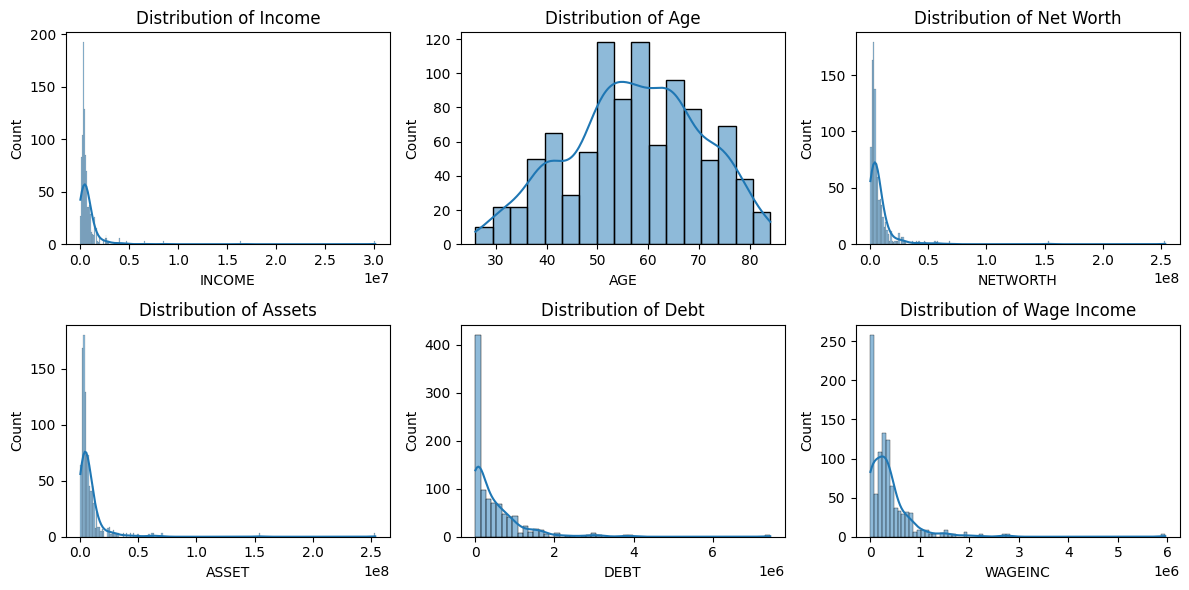

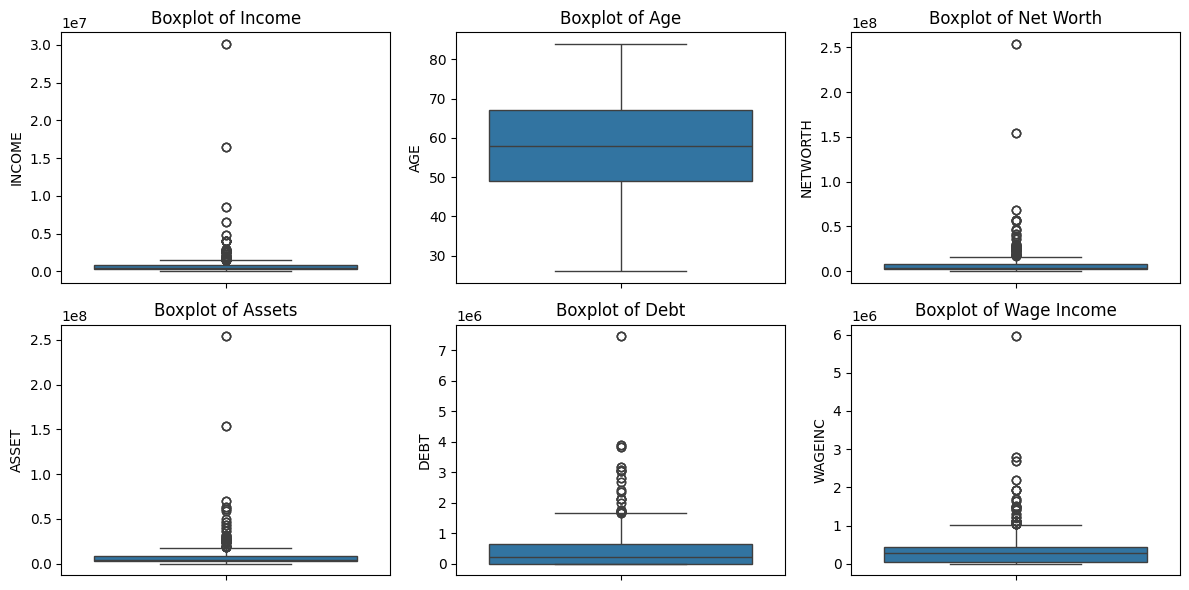

In [203]:
# prompt: describe the distribution of us_scf_concise

# Import necessary libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Describe the distribution of key variables
print(sample_mapped_data_sgd_filtered.describe())

# Histograms for key variables
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(sample_mapped_data_sgd_filtered['INCOME'], kde=True)
plt.title('Distribution of Income')

plt.subplot(2, 3, 2)
sns.histplot(sample_mapped_data_sgd_filtered['AGE'], kde=True)
plt.title('Distribution of Age')


plt.subplot(2, 3, 3)
sns.histplot(sample_mapped_data_sgd_filtered['NETWORTH'], kde=True)
plt.title('Distribution of Net Worth')


plt.subplot(2, 3, 4)
sns.histplot(sample_mapped_data_sgd_filtered['ASSET'], kde=True)
plt.title('Distribution of Assets')


plt.subplot(2, 3, 5)
sns.histplot(sample_mapped_data_sgd_filtered['DEBT'], kde=True)
plt.title('Distribution of Debt')


plt.subplot(2, 3, 6)
sns.histplot(sample_mapped_data_sgd_filtered['WAGEINC'], kde=True)
plt.title('Distribution of Wage Income')


plt.tight_layout()
plt.show()

# Boxplots to visualize potential outliers
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.boxplot(y=sample_mapped_data_sgd_filtered['INCOME'])
plt.title('Boxplot of Income')

plt.subplot(2, 3, 2)
sns.boxplot(y=sample_mapped_data_sgd_filtered['AGE'])
plt.title('Boxplot of Age')

plt.subplot(2, 3, 3)
sns.boxplot(y=sample_mapped_data_sgd_filtered['NETWORTH'])
plt.title('Boxplot of Net Worth')

plt.subplot(2, 3, 4)
sns.boxplot(y=sample_mapped_data_sgd_filtered['ASSET'])
plt.title('Boxplot of Assets')

plt.subplot(2, 3, 5)
sns.boxplot(y=sample_mapped_data_sgd_filtered['DEBT'])
plt.title('Boxplot of Debt')

plt.subplot(2, 3, 6)
sns.boxplot(y=sample_mapped_data_sgd_filtered['WAGEINC'])
plt.title('Boxplot of Wage Income')

plt.tight_layout()
plt.show()

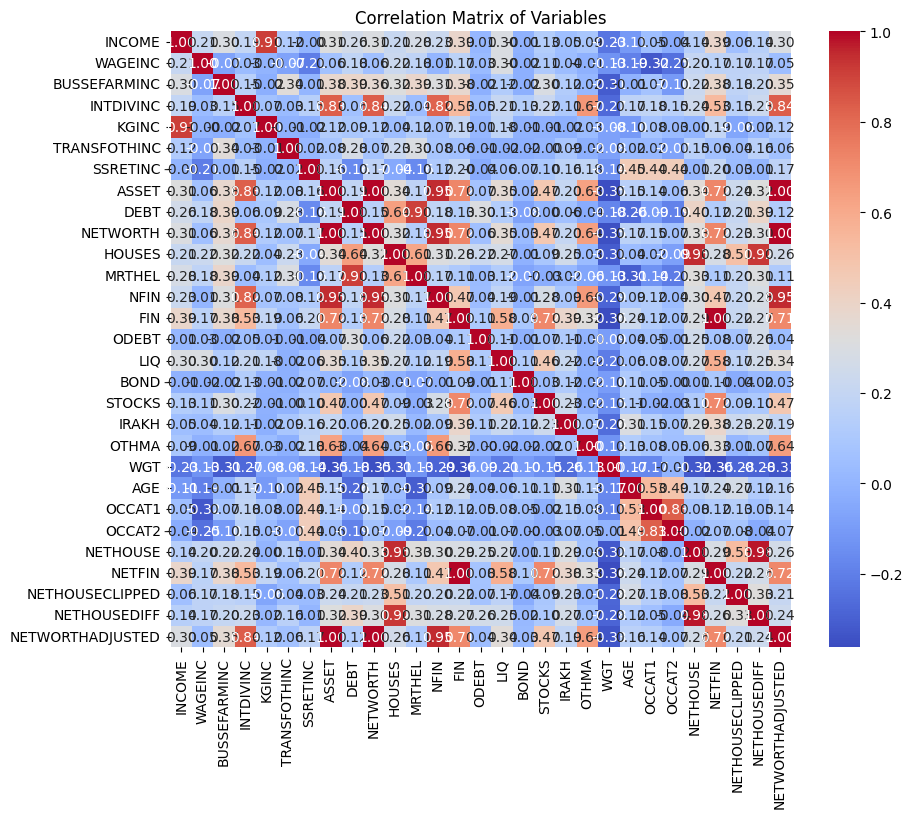

In [204]:
# Correlation matrix
sample_mapped_data_sgd_filtered_corr = sample_mapped_data_sgd_filtered.drop(columns=['Age Group'])
correlation_matrix = sample_mapped_data_sgd_filtered_corr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [205]:
sample_mapped_data_sgd_filtered_noduplicates = sample_mapped_data_sgd_filtered_noduplicates.drop(columns=['OCCAT1', 'OCCAT2'])

In [206]:
sample_mapped_data_sgd_filtered_noduplicates.to_csv('final_synthetic_data.csv', index=False)

In [207]:
sample_mapped_data_sgd_filtered_noduplicates.head()

,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,TRANSFOTHINC,SSRETINC,ASSET,DEBT,NETWORTH,...,AGE,Age Group,NETHOUSE,NETFIN,NETHOUSECLIPPED,NETHOUSEDIFF,NETWORTHADJUSTED,isPersonalQualified,isIncomeQualified,isFinancialQualified
6317,619630.541086,126607.201904,-6851.683868,16414.251353,484086.360227,0.000000,0.0,1723051.2,351390.0,1371661.2,...,35,26-35,107484.0,1222837.2,107484.0,0.0,1371661.2,False,True,True
2473,640483.491986,253214.403808,0.000000,0.000000,297899.298598,89369.789579,0.0,1033500.0,663507.0,369993.0,...,34,26-35,228748.0,44096.0,228748.0,0.0,369993.0,False,True,False
20293,312794.263533,297899.298598,0.000000,74.474825,14894.964929,0.000000,0.0,830520.6,286624.0,543896.6,...,31,26-35,264576.0,238531.8,264576.0,0.0,543896.6,False,True,False
17045,350031.675856,342584.193388,0.000000,0.000000,7596.432114,0.000000,0.0,1366976.0,542932.0,824044.0,...,35,26-35,-52364.0,876408.0,-52364.0,0.0,824044.0,False,True,False
12473,403653.549601,402164.053100,0.000000,14.894965,0.000000,0.000000,0.0,1227522.4,201188.0,1026334.4,...,33,26-35,595296.0,392454.4,595296.0,0.0,1026334.4,False,True,False


In [208]:
sample_mapped_data_sgd_filtered_noduplicates.isna().sum()

,0
INCOME,0
WAGEINC,0
BUSSEFARMINC,0
INTDIVINC,0
KGINC,0
TRANSFOTHINC,0
SSRETINC,0
ASSET,0
DEBT,0
NETWORTH,0


In [222]:
sample_mapped_data_sgd_filtered_noduplicates['PERCENTLIQUIDASSETS'] = sample_mapped_data_sgd_filtered_noduplicates['LIQ'] / sample_mapped_data_sgd_filtered_noduplicates['FIN']
sample_mapped_data_sgd_filtered_noduplicates['PERCENTILLIQUIDASSETS'] = 1 - sample_mapped_data_sgd_filtered_noduplicates['PERCENTLIQUIDASSETS']

sample_mapped_data_sgd_filtered_noduplicates['PERCENTSTOCKS'] = sample_mapped_data_sgd_filtered_noduplicates['STOCKS'] / sample_mapped_data_sgd_filtered_noduplicates['FIN']
sample_mapped_data_sgd_filtered_noduplicates['PERCENTBOND'] = sample_mapped_data_sgd_filtered_noduplicates['BOND'] / sample_mapped_data_sgd_filtered_noduplicates['FIN']
sample_mapped_data_sgd_filtered_noduplicates['PERCENTFINOTHERS'] = 1 - sample_mapped_data_sgd_filtered_noduplicates['PERCENTSTOCKS'] - sample_mapped_data_sgd_filtered_noduplicates['PERCENTBOND'] - sample_mapped_data_sgd_filtered_noduplicates['PERCENTLIQUIDASSETS']

sample_mapped_data_sgd_filtered_noduplicates['PERCENTFIXEDINCOME'] = (sample_mapped_data_sgd_filtered_noduplicates['WAGEINC'] + sample_mapped_data_sgd_filtered_noduplicates['SSRETINC']) / sample_mapped_data_sgd_filtered_noduplicates['INCOME']
sample_mapped_data_sgd_filtered_noduplicates['PERCENTVARIABLEINCOME'] = (sample_mapped_data_sgd_filtered_noduplicates['KGINC'] + sample_mapped_data_sgd_filtered_noduplicates['INTDIVINC'] + sample_mapped_data_sgd_filtered_noduplicates['BUSSEFARMINC']) / sample_mapped_data_sgd_filtered_noduplicates['INCOME']
sample_mapped_data_sgd_filtered_noduplicates['PERCENTOTHERINCOME'] = 1 - sample_mapped_data_sgd_filtered_noduplicates['PERCENTFIXEDINCOME'] - sample_mapped_data_sgd_filtered_noduplicates['PERCENTVARIABLEINCOME']

In [223]:
sample_mapped_data_sgd_filtered_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 6317 to 14272
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   INCOME                 457 non-null    float64 
 1   WAGEINC                457 non-null    float64 
 2   BUSSEFARMINC           457 non-null    float64 
 3   INTDIVINC              457 non-null    float64 
 4   KGINC                  457 non-null    float64 
 5   TRANSFOTHINC           457 non-null    float64 
 6   SSRETINC               457 non-null    float64 
 7   ASSET                  457 non-null    float64 
 8   DEBT                   457 non-null    float64 
 9   NETWORTH               457 non-null    float64 
 10  HOUSES                 457 non-null    float64 
 11  MRTHEL                 457 non-null    float64 
 12  NFIN                   457 non-null    float64 
 13  FIN                    457 non-null    float64 
 14  ODEBT                  457 non-null    flo

In [224]:
sample_mapped_data_sgd_filtered_noduplicates.to_csv('final_synthetic_data.csv', index=False)

In [225]:
import numpy as np

sample_mapped_data_sgd_filtered_noduplicates['RANDOMFACTOR'] = np.random.uniform(0.01, 1.2, size=len(sample_mapped_data_sgd_filtered_noduplicates))

In [226]:
sample_mapped_data_sgd_filtered_noduplicates['COMMITMENTAMOUNT'] = sample_mapped_data_sgd_filtered_noduplicates['RANDOMFACTOR'] * sample_mapped_data_sgd_filtered_noduplicates['NETWORTH']

In [227]:
sample_mapped_data_sgd_filtered_noduplicates = sample_mapped_data_sgd_filtered_noduplicates.drop(columns=['RANDOMFACTOR'])

In [228]:
sample_mapped_data_sgd_filtered_noduplicates.to_csv('final_synthetic_data.csv', index=False)